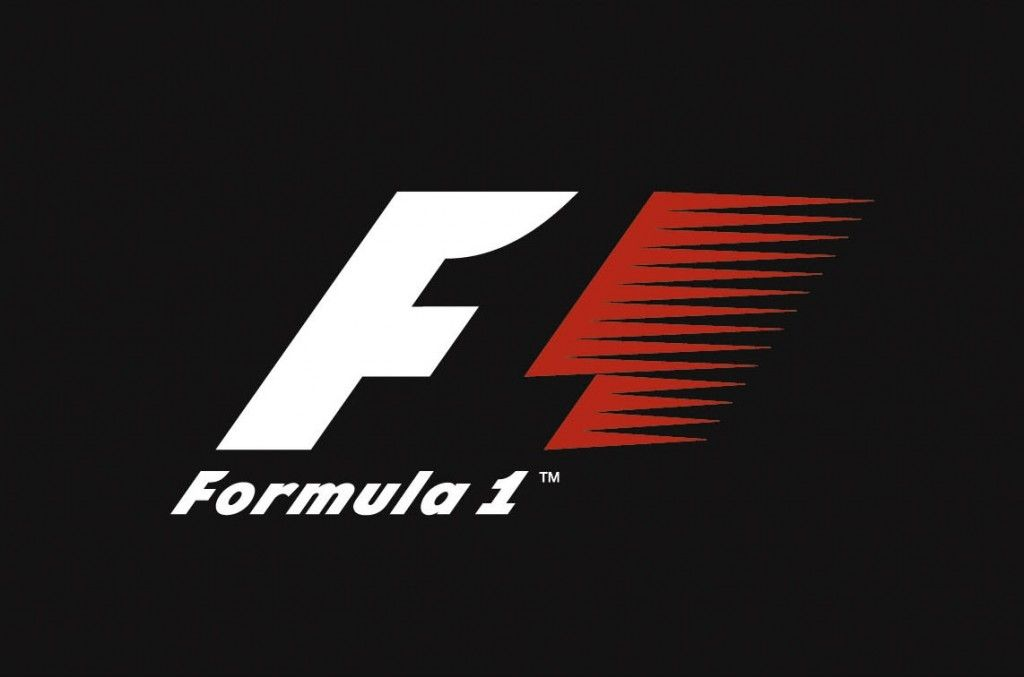

In [13]:
from IPython.display import Image
Image("/Users/isaacshareef/Desktop/Python_Code/Jupyter_Notebook/Data/logo.jpg")

##  What are the attributes that define the classification of a World Champion in Formula 1 Racing.  Through machine learning algorithms can we train a computer to learn the attributes that classify a Formula 1 drivers historical data set as 'champion' or 'not champion'?  Can we pass a set of previously unseen attributes to the machine and accurately predict if those attributes belong to a driver that should be classified as a World Champion?  Using Python and Sci-Kit Learn machine learning algorithms we can make every attempt to do it as accurately as possible.  

## This process is done through Regression & Classification Analysis.  The data used in this Analysis will give you into insights into which attributes define the class 'Formula One World Champion' and which do not.  This analysis uses several models to analyze the data, and several steps are taken to analyze the models for their predictive strenghts and weaknesses.  Finally the analysis shows which features we can use probabilistically to determine who has what it takes to become the next Formula 1 Drivers Champion.  

#### The logo above is trademarked by the FIA.  The FIA is in no way is involved with this analysis.  The features of this analysis are publicy available via the internet.

### Author:  Isaac Shareef
### Date: May 2020

In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression

import warnings
warnings.filterwarnings('ignore')

In [6]:
data = pd.read_csv(
'/Users/isaacshareef/Desktop/Python_Code/Jupyter_Notebook/Data/champions list.csv'
)

 The data loaded into this analysis is a .csv that has the data of the top 100 Formula 1 drivers of all time.  The data goes back to 1950 and is current through the Championship of Lewis Hamilton in 2019.  The features of the data set are: `Driver`, `races attempted`, `first place` finishes, `second place` finishes, `third place` finishes, `podiums`, `pole positions`, `fastest laps`, `points scored` and the labels associated are a binary "is champion" = 1, or "is not champion" = 0.  

The binary classification allows us to use predict which class a group of drivers will belong to given their statistical attributes in the dataset.  The regression tools in the libraries also allows us to predict the probabilities associated with a current drivers quest to become the next Formula 1 Drivers Champion.  

Predictions in a sport like race car driving are pretty obvious for starters.  The more races you win, the higher the probability of becoming a drivers champion.  However, when we want to make future predictions on which drivers have the highest probability of becoming the next drivers champion, we can use all available features in the data to help us make more informed decisions.

This is purely an exercise in machine learing to mathematically describe a feature set and determine the value of the models accuracy.  

If you are a team owner or an enthusiastic fan, the insights into the data of the top 100 drivers, can be useful as a tool for deciding which driver to invest millions in or which driver you want to support.  For me, its all part of the journey of discovery.

In [7]:
data.head()

,0,driver,races,first,second,third,podiums,poles,fastest,points,...,Unnamed: 12,Unnamed: 13,Unnamed: 14,Unnamed: 15,Unnamed: 16,2019,Lewis Hamilton,Mercedes,Mercedes.1,Mercedes.2
0,1,Lewis Hamilton,250,84,39,28,151,88,47,3431.0,...,NaN,NaN,NaN,NaN,NaN,2018.0,Lewis Hamilton,Mercedes,Mercedes,Mercedes
1,2,Sebastian Vettel,240,53,35,32,120,57,38,2985.0,...,NaN,NaN,NaN,NaN,NaN,2017.0,Lewis Hamilton,Mercedes,Mercedes,Mercedes
2,3,Fernando Alonso,311,32,37,28,97,22,23,1899.0,...,NaN,NaN,NaN,NaN,NaN,2016.0,Nico Rosberg,Mercedes,Mercedes,Mercedes
3,4,Kimi Räikkönen,313,21,37,45,103,18,46,1854.0,...,NaN,NaN,NaN,NaN,NaN,2015.0,Lewis Hamilton,Mercedes,Mercedes,Mercedes
4,5,Nico Rosberg,206,23,25,9,57,30,20,1594.5,...,NaN,NaN,NaN,NaN,NaN,2014.0,Lewis Hamilton,Mercedes,Mercedes,Mercedes


In [8]:
#I only need columns 2 through 10
X = data[data.columns[2:10]]

# Column with labels
y = data.is_champion

In [9]:
X.head()

,races,first,second,third,podiums,poles,fastest,points
0,250,84,39,28,151,88,47,3431.0
1,240,53,35,32,120,57,38,2985.0
2,311,32,37,28,97,22,23,1899.0
3,313,21,37,45,103,18,46,1854.0
4,206,23,25,9,57,30,20,1594.5


I want to have a look at the linearity of the data relationships in an 8x8 scatter matrix.  The data is sparse due to the nature of the sport, the number of teams, the tenure of the drivers and the number of races per season.  

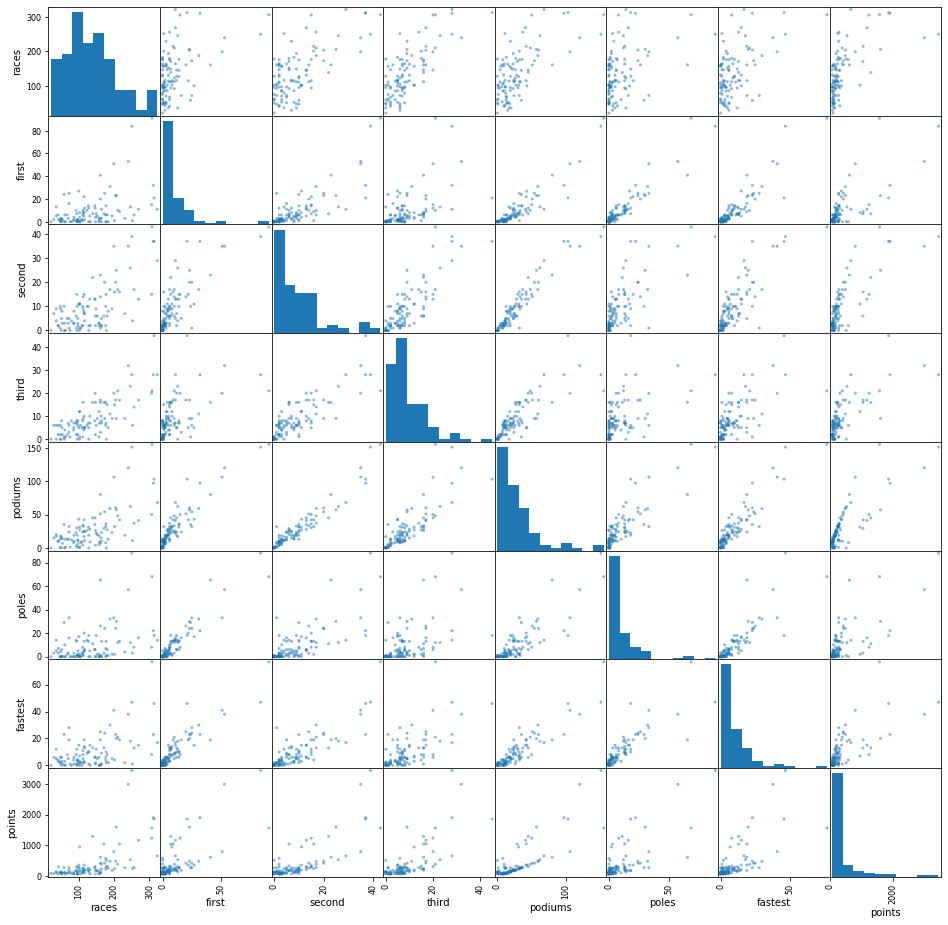

In [12]:
from pandas.plotting import scatter_matrix

attributes = X.columns
scatter_matrix(X[attributes], figsize = (16,16))
plt.show()

In [16]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

scaler = StandardScaler()
X_scale = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(
    X_scale,
    y,
    test_size = 0.3
)


In [19]:
from sklearn.linear_model import LogisticRegression

champ_pred = LogisticRegression()
champ_pred.fit(X_train, y_train)

LogisticRegression()

In [35]:
from sklearn.model_selection import cross_val_score as cvs

cv_score = cvs(champ_pred, X_train, y_train, cv = 3, scoring = 'accuracy')

print(f' The min score is {min(cv_score):.2f}')
print(f' The mean score is {np.mean(cv_score):.2f}')
print(f' The max score is {max(cv_score):.2f}')

 The min score is 0.83
 The mean score is 0.86
 The max score is 0.91


I want to use cross validation scoring to determine the models accuracy.  With K = 3 the `mean training score for accuracy is = 0.86`.  Possible overfitting due to the small dataset size.

[[-0.9220166891149468,
  1.6723359602228636,
  0.7441760943632029,
  -0.7301075399293784,
  0.904333910998622,
  0.8405183321683211,
  0.17222893364165184,
  0.5113199272743105]]

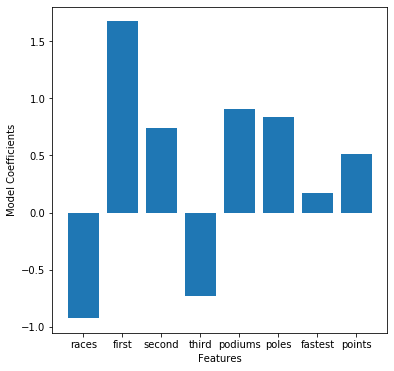

In [25]:
y_pos = np.arange(len(list(X.columns)))
bar_labels = X.columns
coef = champ_pred.coef_
coefs = [i.tolist() for i in coef]


fig, ax = plt.subplots(figsize = (6,6))
plt.bar(y_pos, [val for sublist in coefs for val in sublist])
plt.xticks(y_pos, bar_labels)
plt.xlabel('Features')
plt.ylabel('Model Coefficients')
coefs

It is somewhat surprising to see that the # of races and third place finishes have negative coefficients.  The sign of the value of the regression coefficient determines the direction the independent variable influences the dependent variable.  A negative value in this case seems odd because third place podiums means that points are being generated.  However in this case, `third place` finishes , and `races` appear to make being classified as a World Champion less likely.

In [36]:
#Training a second linear model for results comparisons
from sklearn.linear_model import SGDClassifier as SGDC
sgdc_model = SGDC(random_state = 42)
sgdc_model.fit(X_train, y_train)

SGDClassifier(random_state=42)

In [38]:
from sklearn.model_selection import cross_val_score as cvs

cv_score = cvs(sgdc_model, X_train, y_train, cv = 3, scoring = 'accuracy')

print(f' The min score is {min(cv_score):.2f}')
print(f' The mean score is {np.mean(cv_score):.2f}')
print(f' The max score is {max(cv_score):.2f}')

 The min score is 0.65
 The mean score is 0.77
 The max score is 0.87


The stochastic gradient descent classifier model with 3 folds is yielding a lower mean score than the Logistic Regression model.  I will train one more model for verification.

In [125]:
from sklearn.ensemble import RandomForestClassifier as RFC

rfc_model = RFC(n_estimators = 10)
rfc_model.fit(X_train, y_train)

rfc_model.score(X_train, y_train)

0.9857142857142858

Random Forest Classification is clearly overfitting with a ~ `98%` accuracy of a small population.  

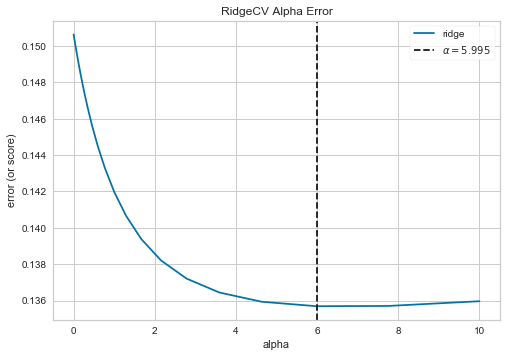

In [36]:
from sklearn.linear_model import RidgeCV
from yellowbrick.regressor import AlphaSelection

alphas = np.logspace(-10, 1, 100)
visualizer = AlphaSelection(RidgeCV(alphas=alphas))
visualizer.fit(X_train, y_train)
visualizer.show()

Let see what training score we get when we balance out the effect of our coefficients through L2-Regularization.  With this small data set and a high contribution from first place finishes coefficient, I will use a cross validation technique to find the alpha that produces the lowest error.  Alpha = 5.95

In [51]:
#Training a ridge classification model
from sklearn.linear_model import RidgeClassifier as RC
rc_model = RC(alpha = 5.9, random_state = 42)
rc_model.fit(X_train, y_train)

RidgeClassifier(alpha=5.9, random_state=42)

In [52]:
#rcv is ridge cross validation
rcv_score = cvs(rc_model, X_train, y_train, cv = 3, scoring = 'accuracy')

print(f' The min score is {min(rcv_score):.2f}')
print(f' The mean score is {np.mean(rcv_score):.2f}')
print(f' The max score is {max(rcv_score):.2f}')

 The min score is 0.78
 The mean score is 0.83
 The max score is 0.91


Through fine-tuning alpha in the RidgeClassifier the classification accuracy is 3 percentage points lower than the Logistic Regression Model.  Let's start to look at the performace of the Ridge Classification model by viewing its ouput in the `Confustion Matrix.`

In [57]:
from sklearn.model_selection import cross_val_predict as cvp

y_train_pred = cvp(sgdc_model, X_train, y_train, cv=3)

In [58]:
from sklearn.metrics import confusion_matrix as cm

confusion_m = cm(y_train, y_train_pred)
confusion_m

array([[35,  9],
       [ 7, 19]])

The top row of the output array is the `negative class`, or `is not champion`, 35 were classified correctly as `is not champion` and 9 were incorrectly classified.  The second row is the `positive class` or `is champion` class and 7 were incorrectly classified as `is champion` and 19 were correctly classified as `is champion`.  This pretty much means that accuracy score alone is not sufficient to validate any one model.

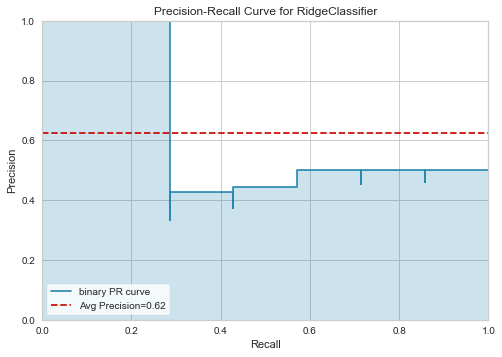

In [63]:
from yellowbrick.classifier import PrecisionRecallCurve

#creating a precision vs recall curve
viz = PrecisionRecallCurve(rc_model)
viz.fit(X_train, y_train)
viz.score(X_test, y_test)
viz.show()

In [74]:
from sklearn.metrics import precision_score as ps, recall_score as rs

pres_scr = ps(y_train, y_train_pred)
recal_scr = rs(y_train, y_train_pred)

print(f' Precision Score = {pres_scr:.2f}')
print(f' Recall Score = {recal_scr:.2f}')

 Precision Score = 0.68
 Recall Score = 0.73


Things to consider: A low `precision score` is associated with high number of false positives.  The higher the number of `false positives`, the lower the `precision score.`  This model is generating enough false positives that I am not willing to bet on it.

A low `recall score` is associated with a high number of false negatives.  The higher the number of `false negatives`, the lower the `recall score.`  The model has a better chance of sniffing out who is definitely not a champion and is less likely to classify a non-champion incorrctly.

In [69]:
hamilton = np.array(X_train[0]).reshape(1,8)
hamilton_score = rc_model.decision_function(hamilton)
hamilton_score


array([0.96186907])

Lets look a little deeper under the hood and see how its making its classification decisions.  The model gives Lewis Hamilton, a known World Champion, a score of 0.96.

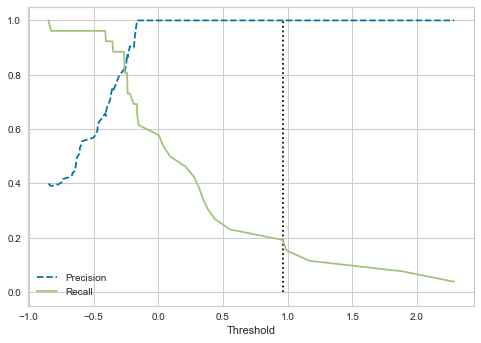

In [72]:
from sklearn.metrics import precision_recall_curve as prc
y_scores = rc_model.decision_function(X_train)
precisions, recalls, thresholds = prc(y_train, y_scores)

def plot_precision_recall_vs_threshold(precisions, recalls, thresholds):
    plt.plot(thresholds, precisions[:-1], 'b--', label = 'Precision')
    plt.plot(thresholds, recalls[:-1], 'g-', label = 'Recall')

plot_precision_recall_vs_threshold(precisions, recalls, thresholds)
plt.vlines(0.96, 0, 1, linestyle = 'dotted', color = 'black')
plt.xlabel("Threshold")
plt.legend()
plt.show()

What is the relationship between Threshold, Recall, and Precision in this model.  In Sci-Kit Learn Classification Algorithms the `decision_function() method` creates a score for each training instance.  Based on the threshold, and the decision score of the training instance, it is then classified in either the positive class or negative class.  Positive class meaning `is champion` or negative class, meaning `is not champion`

Two cells above I printed the decision score for Lewis Hamilton = `0.96`.  We can see that as Threshold increases the precision score goes up.  So Lewis Hamilton's training instance has a decision score of 0.96(vertical dashed black line) which pretty much guarantees that he is classified as `is champion`.  I'm glad we got that correct. 

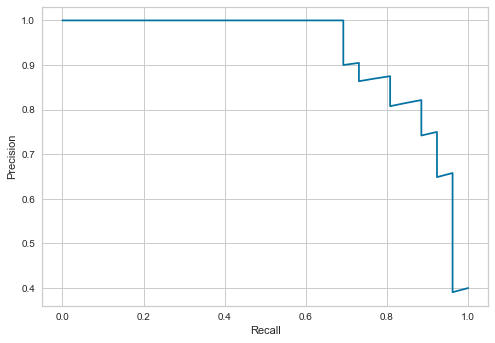

In [73]:
plt.plot(recalls, precisions)
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.show()

If we wanted to see what trade offs we can make between precision and recall we can view the precision vs recall plot above to see how the trade-offs will affect our precision or recall accuracy.  If we are more interested in precision, or accuracy in our positive classification, then we would suffer with regard to recall; And the opposite holds true.  If we are more concerned with ensuring that we dont misclassify the negative instance incorrectly then we would aim for a higher recall.  In this model precision really drops off past a recall of 0.7.

So the model above told us that `first place` wins in the definining feature for predicting classification.  That was obvious prior going into this exercise.  However since there are several young drivers that are nipping at the heals of Lewis Hamilton to become the next drivers champion let's extrapolate a little.  I want to see what number of `first place` wins, or any other feature probabilities look like.

In [88]:
#wins modeling
wins_model = LogisticRegression()
wins_model.fit(np.array(X['first']).reshape(-1,1), y)

#generate the win probabilities
win_samples = np.arange(0, 20, 1)
win_probs= []

for i in win_samples:
    win_loss, win_win = wins_model.predict_proba([[i]])[0]
    win_probs.append(win_win)

#points modeling
points_model = LogisticRegression()
points_model.fit(np.array(X['points']).reshape(-1,1), y)

#generate points probabilities
point_samples = np.arange(0, 4000, 1)
point_probs = []

for i in point_samples:
    point_loss, point_win = points_model.predict_proba([[i]])[0]
    point_probs.append(point_win)
    
#pole position modeling
poles_model = LogisticRegression()
poles_model.fit(np.array(X['poles']).reshape(-1,1), y)

#generate pole position probabilities to predict world champion probabilities
pole_samples = np.arange(0, 90, 1)
pole_probs = []

for i in pole_samples:
    pole_loss, pole_win = poles_model.predict_proba([[i]])[0]
    pole_probs.append(pole_win)

If we just wanted to do a single feature analysis and see how the features look probabilistically I created 3 models above and plooted their probabilities below.

Text(0.5, 1.0, 'Probability of Becoming a World Champion Based on Cumulative Pole Positions')

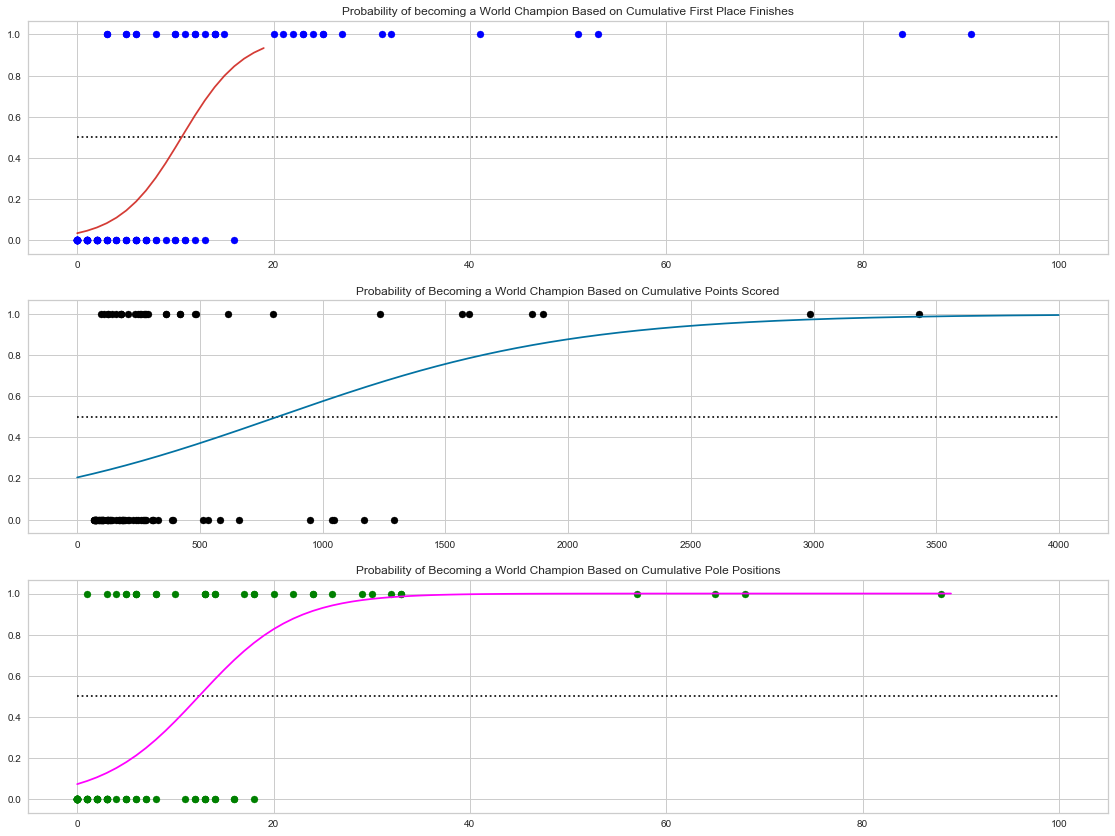

In [89]:
fig, axs = plt.subplots(3)
plt.subplots_adjust(bottom = 1, top = 3, right = 2)

axs[0].scatter(data['first'], y, color = 'blue')
axs[0].hlines(0.5, 0, 100, linestyle = 'dotted', label = '50%')
axs[0].plot(win_samples, win_probs, alpha = 0.8, color = 'r')
axs[0].set_title('Probability of becoming a World Champion Based on Cumulative First Place Finishes')

axs[1].scatter(data.points, y, color = 'black')
axs[1].hlines(0.5, 0, 4000, linestyle = 'dotted', label = '50%')
axs[1].plot(point_samples, point_probs)
axs[1].set_title('Probability of Becoming a World Champion Based on Cumulative Points Scored')

axs[2].scatter(data.poles, y, color = 'green')
axs[2].hlines(0.5, 0, 100, linestyle = 'dotted', label = '50%')
axs[2].plot(pole_samples, pole_probs, color = 'magenta')
axs[2].set_title('Probability of Becoming a World Champion Based on Cumulative Pole Positions')

In [126]:
#marry up win samples on the left and probabilites on the right
from pandas import Series

winner_prob = Series(win_probs, win_samples)
winner_prob

0     0.033378
1     0.045246
2     0.061068
3     0.081946
4     0.109134
5     0.143927
6     0.187478
7     0.240506
8     0.302940
9     0.373608
10    0.450117
11    0.529060
12    0.606576
13    0.679073
14    0.743852
15    0.799417
16    0.845434
17    0.882446
18    0.911522
19    0.933945
dtype: float64

So it looks like after your 10th first place finish your probability of classifying as a Drivers Champion goes above 50%.  So who are those drivers closest to the 50% threshold?

In [118]:
future_champs = data[(
    data['first'] < 11)
    & (data['first'] > 6)
    & (data['races'] < 200)]

future_champs[['driver','first']]

,driver,first
6,Valtteri Bottas,7
10,Daniel Ricciardo,7
11,Max Verstappen,8
28,Juan Pablo Montoya,7
40,Jody Scheckter,10
41,Denny Hulme,8
48,Ronnie Peterson,10
53,Jacky Ickx,8
54,René Arnoux,7
57,James Hunt,10


By filtering the data set for `first` place finishes < 11 & `first` place finishes > 6, and < 200 races , the active drivers to watch will be:

Valtteri Bottas, Daniel Ricciardo, and Max Verstappen.

Who will be next to dethrone Lewis Hamilton as the next Formula 1 Drivers Champion.